In [1]:
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import os, sys
import warnings
warnings.filterwarnings('ignore')

dir_package = "../"
sys.path.insert(0, dir_package + "src/cloudbanddetection/")
from tracking import plot_tracking_on_map
from io_utilities import load_ymlfile, load_data_from_saved_var_files
from time_utilities import create_list_of_dates, add_startend_datetime2config

#### Load configuration file and make adjustements for this test case

In [2]:
config_file = dir_package + "config/config_analysis.yml"
config = load_ymlfile(config_file, isconfigfile=True)
# Make sure that the period for the cloud bands cover the same period as the example data
config["startdate"] = "20210219.00"
config["enddate"] = "20210228.00"
config["saved_dirpath"] = dir_package + "data/"

print("Example data exists:", os.path.isfile(config['saved_dirpath']+"/list_of_cloud_bands"+config['startdate']+"-"+config['enddate']+"-"+config['domain']+".pickle")) 
print(config)

Example data exists: True
{'domain': 'southPacific', 'startdate': '20210219.00', 'enddate': '20210228.00', 'saved_dirpath': '../data/', 'dir_figures': './cloud_band_figures/', 'load_saved_files': True, 'period_detection': 24.0, 'select_djfm': False, 'hemisphere': 'south', 'lon_west': 130, 'lon_east': 290, 'lat_north': 5, 'lat_south': -50, 'datetime_startdate': datetime.datetime(1983, 1, 1, 0, 0), 'datetime_enddate': datetime.datetime(2019, 12, 31, 0, 0)}


#### Load cloud bands from the South Pacific for the dates specified in the analyses config file

In [3]:
add_startend_datetime2config(config)
listofdates = create_list_of_dates(config)
print(str(len(listofdates))+" dates created from "+str(listofdates[0])+" to "+str(listofdates[-1]))

10 dates created from 2021-02-19 00:00:00 to 2021-02-28 00:00:00


In [4]:
# Load one year of cloud bands
print(config)
list_of_cloud_bands = load_data_from_saved_var_files(config, varname="list_of_cloud_bands")
print(len(list_of_cloud_bands),"days of cloud bands")

{'domain': 'southPacific', 'startdate': '20210219.00', 'enddate': '20210228.00', 'saved_dirpath': '../data/', 'dir_figures': './cloud_band_figures/', 'load_saved_files': True, 'period_detection': 24.0, 'select_djfm': False, 'hemisphere': 'south', 'lon_west': 130, 'lon_east': 290, 'lat_north': 5, 'lat_south': -50, 'datetime_startdate': datetime.datetime(2021, 2, 19, 0, 0), 'datetime_enddate': datetime.datetime(2021, 2, 28, 0, 0)}
10 days of cloud bands


#### Import longitudes and latitudes for the map

In [5]:
lats_globe = np.load(dir_package + "data/lats_globe0.5_ERA5.npy")
lons_globe = np.load(dir_package + "data/lons_globe0.5_ERA5.npy")
# Get longitudes and latitudes of South Pacific domain
lon_ids = [id for id, el in enumerate(lons_globe) if el <= config["lon_east"] if el >= config["lon_west"]]
lonsSP = lons_globe[lon_ids]
lat_ids = [id for id, el in enumerate(lats_globe) if el <= config["lat_north"] if el >= config["lat_south"]]
latsSP = lats_globe[lat_ids]
print(f"Longitudes, min: {lonsSP.min()}, max: {lonsSP.max()}")
print(f"Latitudes, min: {latsSP.min()}, max: {latsSP.max()}")

Longitudes, min: 130.0, max: 290.0
Latitudes, min: -50.0, max: 5.0


#### Create the series of map with connection lines between the centroid lcoation of each cloud bands

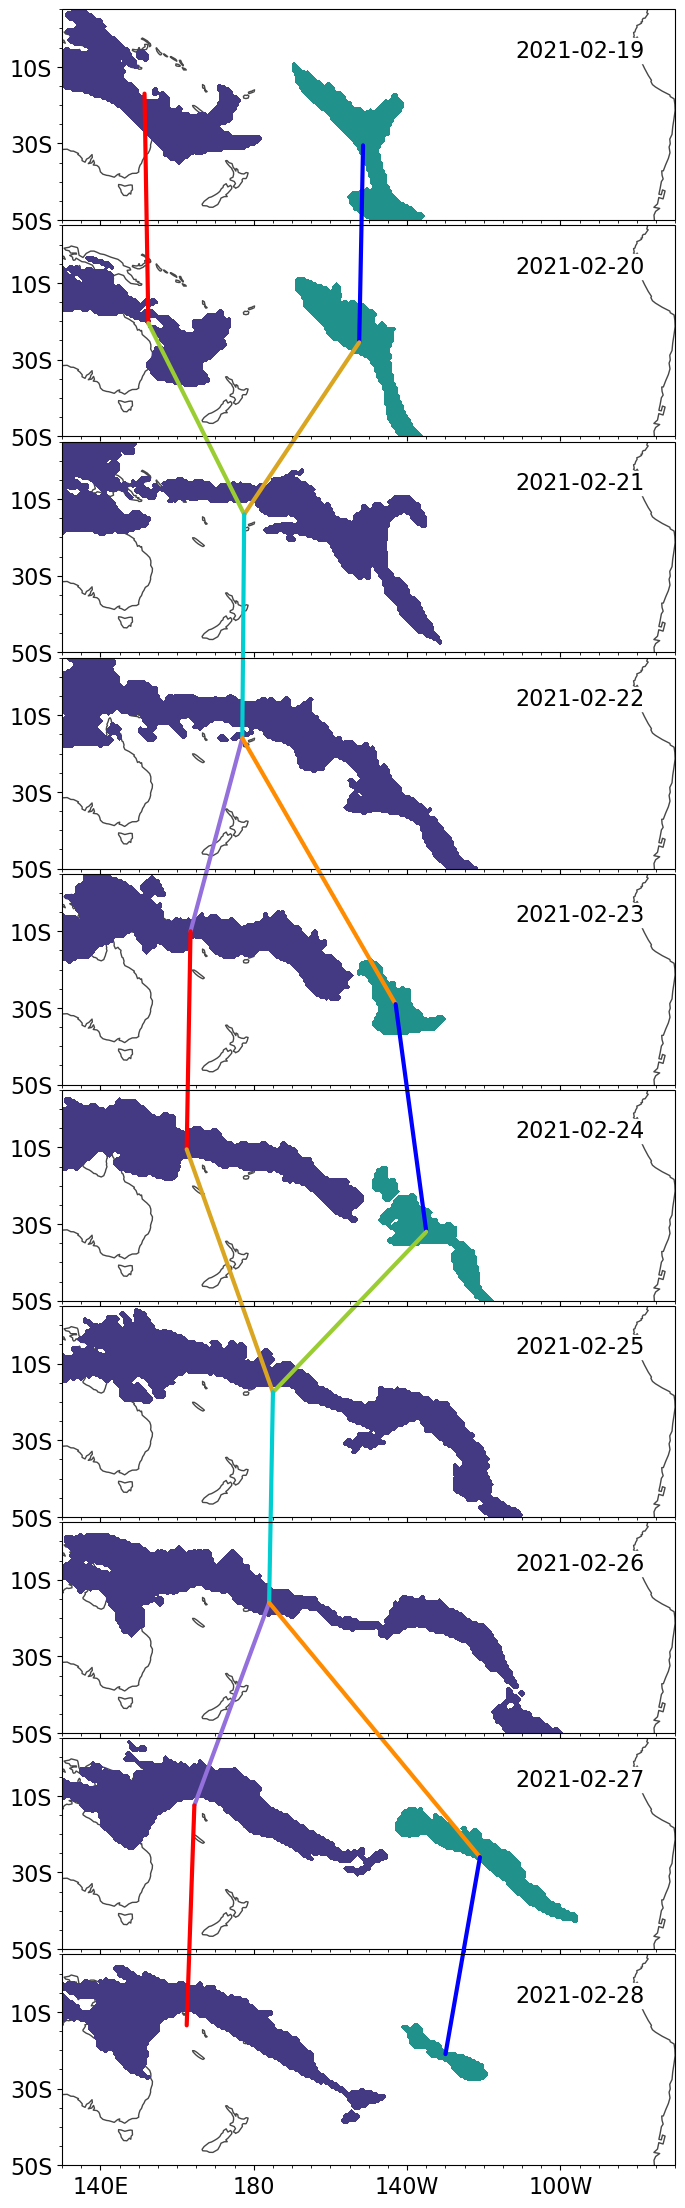

In [6]:
plot_tracking_on_map(
    list_of_cloud_bands=list_of_cloud_bands,
    lons=lonsSP,
    lats=latsSP,
    listofdates=listofdates,
    config=config,
    show=True,
    save=False,
)